In [9]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin
import time

import sys
sys.path.append("..")

from Model.model_spheroid import *
from Model.init_spheroid import *


from matplotlib import rcParams
params = {'legend.fontsize': '10',
         'axes.labelsize': '18',
         'axes.titlesize':'18',
         'xtick.labelsize':'16',
         'ytick.labelsize':'16',
         'font.family': 'sans-serif',
         'text.usetex': True}
rcParams.update(params)

# animations in jupyter notebook
%matplotlib notebook 

import matplotlib

cmap = matplotlib.colormaps.get_cmap('Spectral')

def fun_color(v):
    u = np.array([1,0])
    return cmap(np.arccos(np.dot(u,v)/lin.norm(u)/lin.norm(v))/np.pi)

In [2]:
R = 100
L = 240
tmax = 200
dt = .1

Fc = 5.18 # Critical adhesive force (see below)

#Fa, Fa_y = .13*Fc, .33*Fc # outer rotation
Fa, Fa_y = .2*Fc, .2*Fc # global rotation 
#Fa, Fa_y = .35*Fc, .12*Fc # no rotation

Np = 3
rp = 10
kp = 10


N = return_N(Np, rp, kp)
M = 200

#print(N)

init_positions = init_positions_N(N, R, L)
init_velocities = init_velocities_N(N)
init_ecm = init_ecm_M(Np, rp, kp, M, R, L)


model = spheroid_model(L, tmax, dt, init_positions, init_velocities, init_ecm, Fa, Fa_y)
Fc = model.Fr/model.Fstar
print('Critical adhesive force = ', Fc)
model.solver(method = 'RK4')

Critical adhesive force =  5.183727034120735


In [3]:
sol_x,sol_v, sol_y = model.sol_x, model.sol_v, model.sol_y
sol_x = np.array(sol_x)
sol_v = np.array(sol_v)

<IPython.core.display.Javascript object>


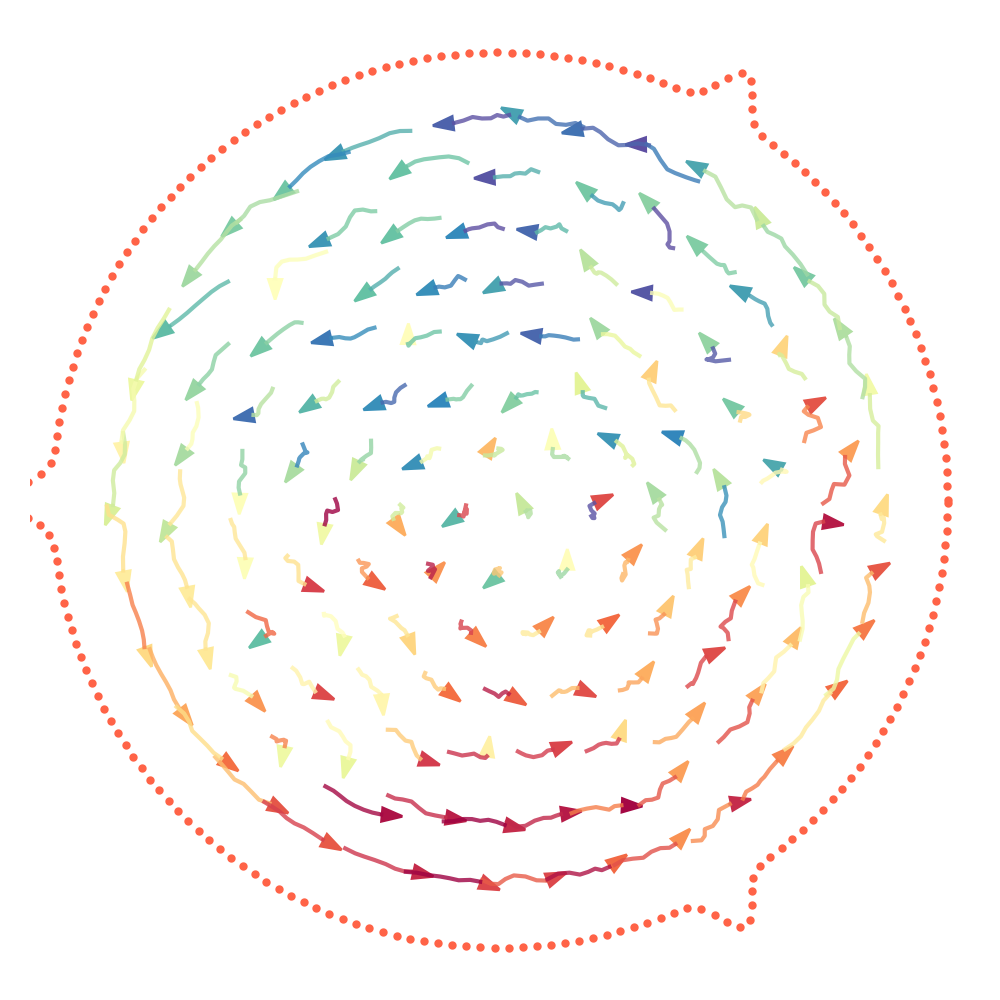

In [4]:
plt.figure(figsize = (5,5))
a = 1.05

plt.xlim(L/2 - a*R,L/2 + a*R)
plt.ylim(L/2 - a*R,L/2 + a*R)

plt.scatter(init_ecm[:,0], init_ecm[:,1], s = 4, color = 'tomato')

plt.axis('off')

lent = 7
start = -lent
for i in range(N):
    plt.plot(sol_x[start-lent:start+1,i,0],sol_x[start-lent:start+1,i,1], color = fun_color(sol_v[start+1][i]), alpha = .8)
    
i = start
for k in range(len(sol_x[0])):
    plt.arrow(sol_x[i][k,0],sol_x[i][k,1], sol_v[i][k,0]/30,sol_v[i][k,1]/30,head_width = 3, color = fun_color(sol_v[i][k]))
       
plt.tight_layout()

#plt.savefig('snapshot.png', transparent = True, dpi = 1200)

plt.show()

<IPython.core.display.Javascript object>


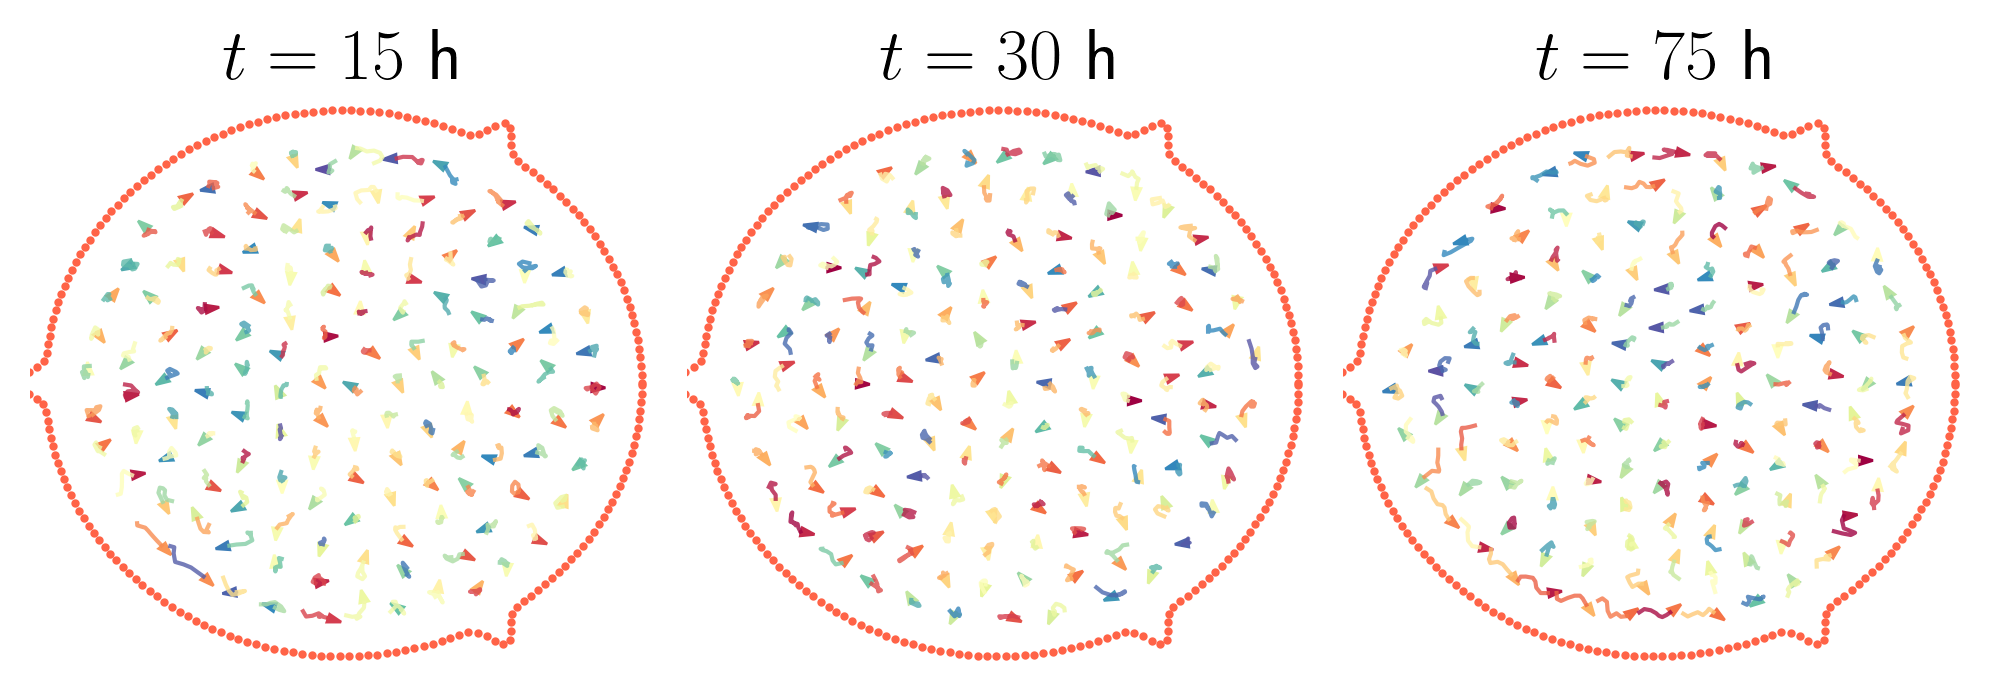

In [10]:
fig, ax = plt.subplots(1,3, figsize =(10,3.5))

starts = [-75,-65,-50]
starts = [int(10/0.2),int(30/0.3),int(75/0.3)]
tspan1 = np.linspace(0,tmax,len(sol_x))

a = 1.05

for i in range(3):
    ax[i].axis('off')
    ax[i].set_xlim(L/2 - a*R,L/2 + a*R)
    ax[i].set_ylim(L/2 - a*R,L/2 + a*R)
    ax[i].scatter(init_ecm[:,0], init_ecm[:,1], s = 4, color = 'tomato')
    ax[i].set_title('$t = ' + str(int(tspan1[starts[i]])) + '$ h', fontsize = 26)
    start = starts[i]
    for ii in range(N):
        ax[i].plot(sol_x[start-lent:start+1,ii,0],sol_x[start-lent:start+1,ii,1], color = fun_color(sol_v[start+1][ii]), alpha = .8)
    
    ii = start
    for k in range(len(sol_x[0])):
        ax[i].arrow(sol_x[ii][k,0],sol_x[ii][k,1], sol_v[ii][k,0]/30,sol_v[ii][k,1]/30,head_width = 3, color = fun_color(sol_v[ii][k]))

plt.tight_layout()
#plt.savefig('multiple_snapshots.png', transparent = True, dpi = 1200)
plt.show()

<IPython.core.display.Javascript object>


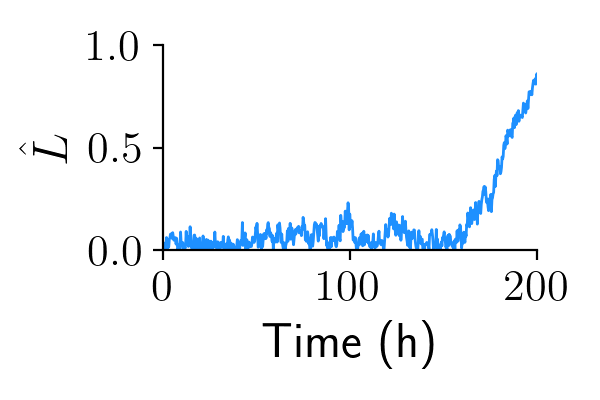

In [11]:
L_ang = np.abs(np.array([np.sum(np.cross((np.array([L/2,L/2])-sol_x[i]),sol_v[i])/lin.norm(np.array([L/2,L/2])-sol_x[i], axis = 1)/lin.norm(sol_v[i], axis = 1)/N) for i in range(len(sol_x))]))

fig, ax = plt.subplots(figsize = (3,2))
ax.set_ylim(0,1)
ax.set_xlim(0,tmax)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.set_ylabel('$\hat{L}$')
ax.set_xlabel('Time (h)')
ax.set_yticks([0,0.5,1])
tspan = np.linspace(0,tmax,len(L_ang))
ax.plot(tspan, L_ang, color = 'dodgerblue', lw = 1)
plt.tight_layout()
        
#plt.savefig('angular_momentum.png', transparent = True, dpi = 1200)

plt.show()

<IPython.core.display.Javascript object>


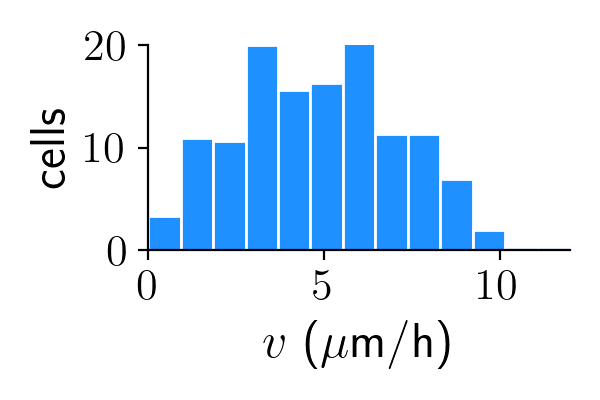

In [12]:

indexes = [-1,-25, -50]

vels = lin.norm(np.concatenate([sol_v[i] for i in indexes]), axis = 1)
rads = lin.norm(np.concatenate([sol_x[i] - np.array([L/2,L/2]) for i in indexes]), axis = 1)
xbins = np.linspace(0,12,14)

fig, ax = plt.subplots(figsize = (3,2))
ax.set_ylim(0,20)
ax.set_xlim(0,xbins[-1])
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_visible(False)
plt.hist(lin.norm(np.concatenate([sol_v[i] for i in indexes]), axis = 1), bins = xbins, color = 'dodgerblue', weights = [1/len(indexes) for i in vels],edgecolor = 'white')

plt.ylabel('cells')
plt.xlabel('$v$ ($\\mu$m$/$h)')
plt.tight_layout()

#plt.savefig('v_histogram.png', transparent = True, dpi = 1200)
plt.show()

<IPython.core.display.Javascript object>


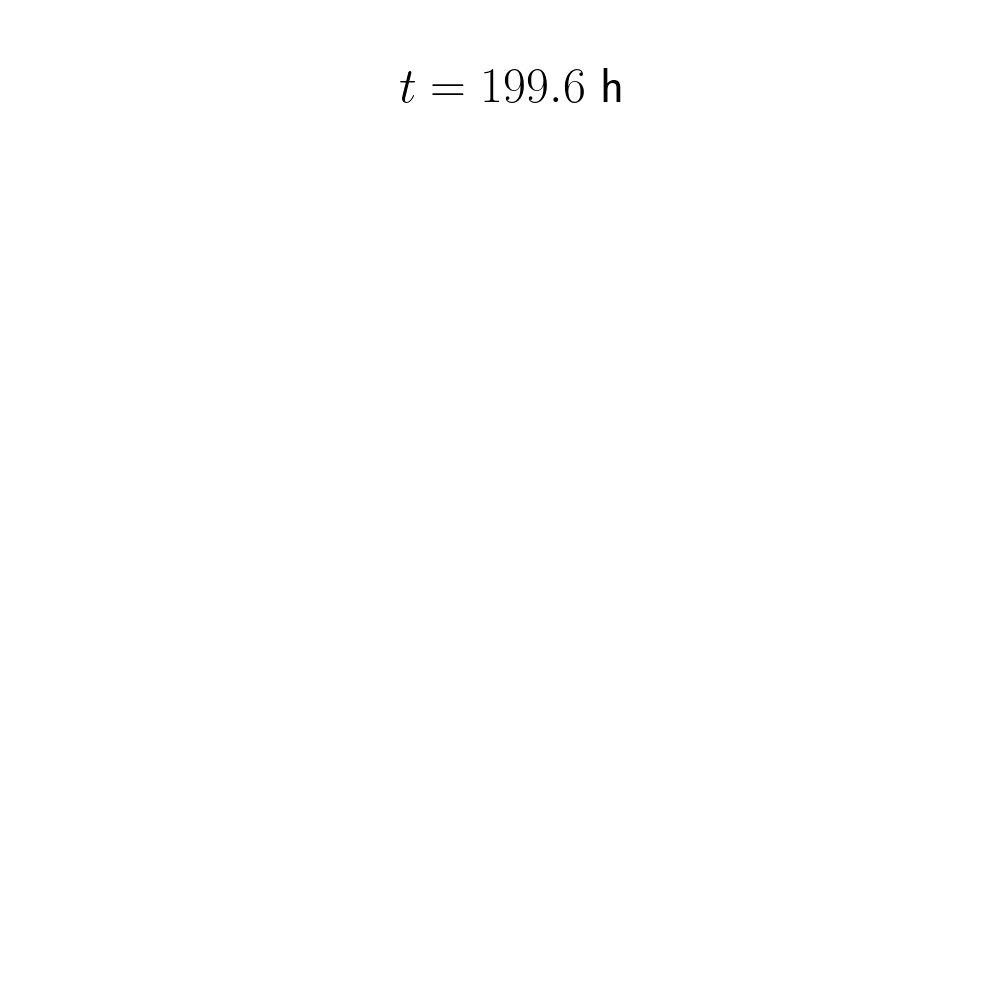

In [13]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(111)

plt.ion()
fig.show()

ax.set_xlim(0,L)
ax.set_ylim(0,L)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.axis('off')

fig.canvas.draw()

indexes = [i for i in range(0,len(sol_x)) if i%5 == 0]

tspan = np.linspace(0,tmax,len(sol_x))

for i in indexes:
    for k in range(len(sol_x[0])):
        ax.arrow(sol_x[i][k,0],sol_x[i][k,1], (sol_x[i+1][k,0]-sol_x[i][k,0])/30, (sol_x[i+1][k,1]-sol_x[i][k,1])/30,head_width = 2.5, color = fun_color( (sol_x[i+1][k]-sol_x[i][k]) ))

    points = ax.scatter(sol_y[0][:,0],sol_y[0][:,1], color = 'red',s = 1.05, marker='o')
    ax.set_title('$t = ' + str(int(10*tspan[i])/10) + '$ h')
    fig.canvas.draw()
    time.sleep(1e-1)
    if i == 0 or i == indexes[-1]:
        time.sleep(3)
    points.remove()

    arrows = ax.get_children()
    for k in range(len(sol_x[0])):
        arrows[k].remove() 

plt.show()

<IPython.core.display.Javascript object>


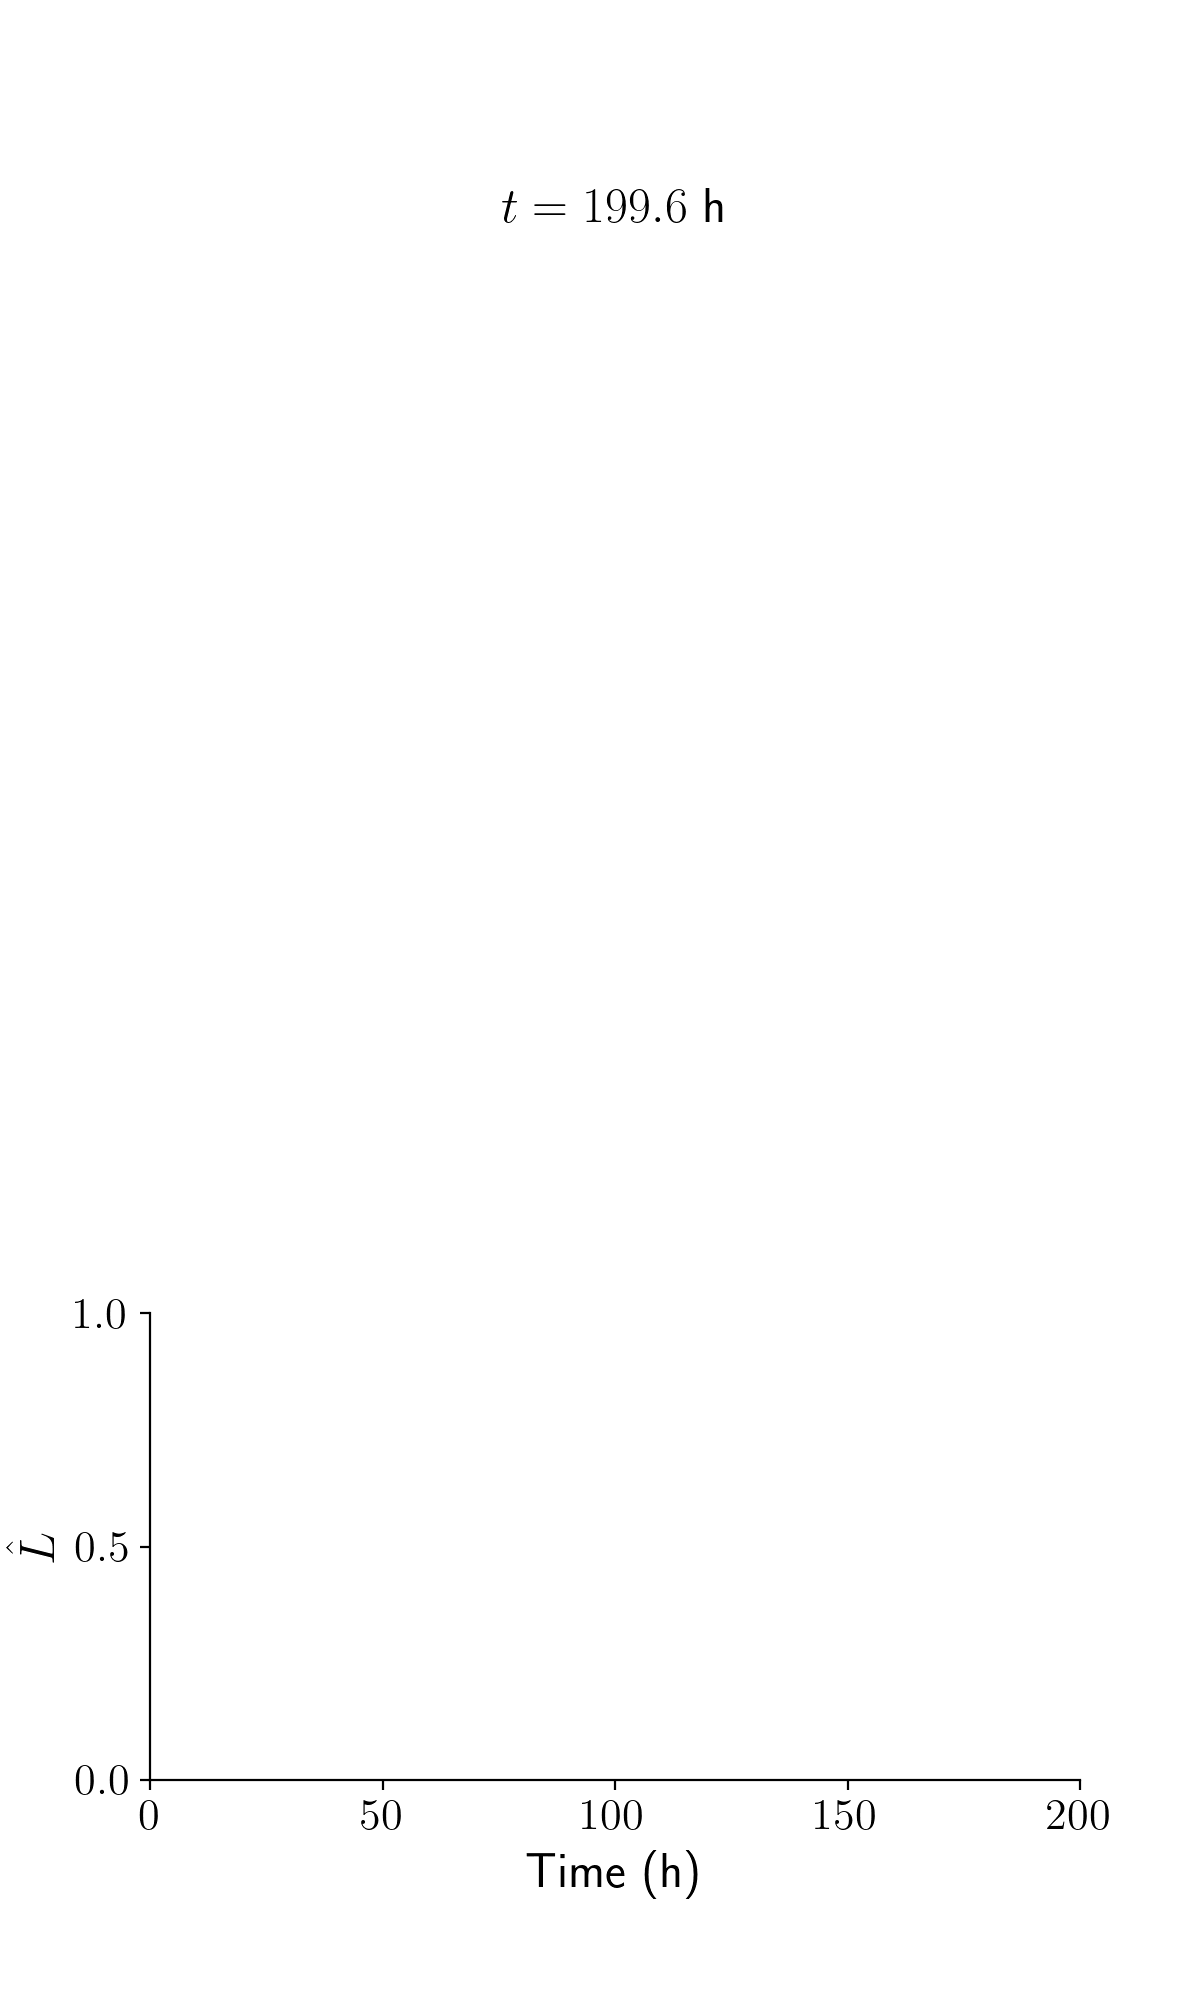

In [14]:
fig, ax = plt.subplots(2,1,figsize = (6,10), gridspec_kw={'height_ratios': [2, 1]})

plt.ion()
fig.show()

ax[0].set_xlim(0,L)
ax[0].set_ylim(0,L)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y$')
ax[0].axis('off')

ax[1].set_ylim(0,1)
ax[1].set_xlim(0,tmax)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_position('zero')
ax[1].spines['top'].set_visible(False)
ax[1].set_ylabel('$\hat{L}$')
ax[1].set_xlabel('Time (h)')
ax[1].set_yticks([0,0.5,1])

fig.canvas.draw()

indexes = [i for i in range(0,len(sol_x)) if i%5 == 0]

# Angular momentum
L_ang = np.abs(np.array([np.sum(np.cross((np.array([L/2,L/2])-sol_x[i]),sol_v[i])/lin.norm(np.array([L/2,L/2])-sol_x[i], axis = 1)/lin.norm(sol_v[i], axis = 1)/N) for i in range(len(sol_x))]))

tspan = np.linspace(0,tmax,len(sol_x))
for i in indexes:
    for k in range(len(sol_x[0])):
        
        ax[0].arrow(sol_x[i][k,0],sol_x[i][k,1], (sol_x[i+1][k,0]-sol_x[i][k,0])/30, (sol_x[i+1][k,1]-sol_x[i][k,1])/30,head_width = 2.5, color = fun_color( (sol_x[i+1][k]-sol_x[i][k]) ))
    
    points = ax[0].scatter(sol_y[0][:,0],sol_y[0][:,1], color = 'red',s = 1.05, marker='o')
    point1 = ax[1].scatter([tspan[i]], [L_ang[i]], color = 'none', edgecolor = 'black', s = 25)
    ax[0].set_title('$t = ' + str(int(10*tspan[i])/10) + '$ h')
    
    line = ax[1].plot(tspan[:i], L_ang[:i], color = 'dodgerblue', lw = 2)

    fig.canvas.draw()
    time.sleep(1e-1)
    if i == 0 or i == indexes[-1]:
        time.sleep(5)
    points.remove()
    point1.remove()
    line[0].remove()

    arrows = ax[0].get_children()
    for k in range(len(sol_x[0])):
        arrows[k].remove() 

plt.show()